# 1. gathering data
# 2. understanding data (variable types,ploting)
# 3. data prepocession (null values,outlayers)
# 4. feature engneering (text to numaric,scaling)
# 5. selecting algoitham 
# 6. accuracy 

# f(X) = y

In [28]:
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_boston

In [147]:
data = load_boston()

In [148]:
df = pd.DataFrame(data.data,columns=data.feature_names)
print(df.shape)
df.head()

(506, 13)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [149]:
hourse_prices = pd.Series(data.target,name="Hourse_prices")
hourse_prices.head(5)

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: Hourse_prices, dtype: float64

In [12]:
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

# understand data 

# continous varibles

In [25]:
len(["CRIM","ZN","INDUS","NOX","RM","AGE","DIS","TAX","PTRATIO","B","LSTAT"]),len(["CHAS","RAD"])

(11, 2)

In [27]:
df[["CRIM","ZN","INDUS","NOX","RM","AGE","DIS","TAX","PTRATIO","B","LSTAT"]].describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,711.000000,22.000000,396.900000,37.970000


<AxesSubplot:>

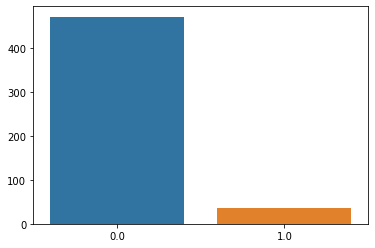

In [43]:
sns.barplot(x=df["CHAS"].value_counts().index,y=df["CHAS"].value_counts().values)

<AxesSubplot:>

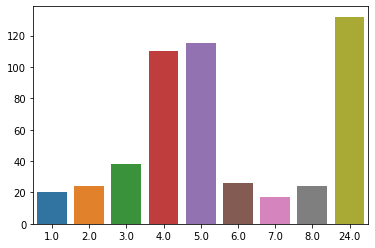

In [44]:
sns.barplot(x=df["RAD"].value_counts().index,y=df["RAD"].value_counts().values)

<AxesSubplot:xlabel='CRIM', ylabel='Count'>

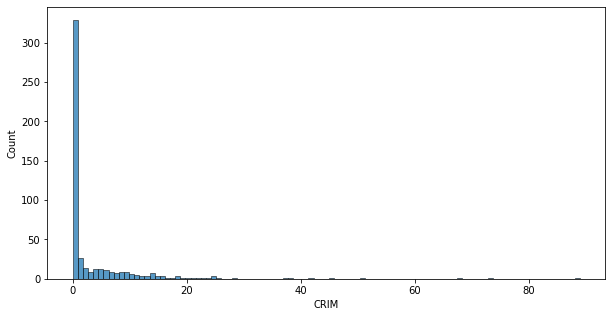

In [55]:
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(df["CRIM"],ax=ax)

<AxesSubplot:xlabel='TAX', ylabel='Count'>

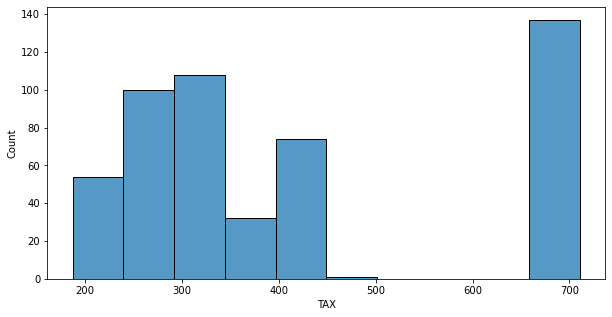

In [57]:
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(df["TAX"],ax=ax)

<AxesSubplot:xlabel='AGE', ylabel='Count'>

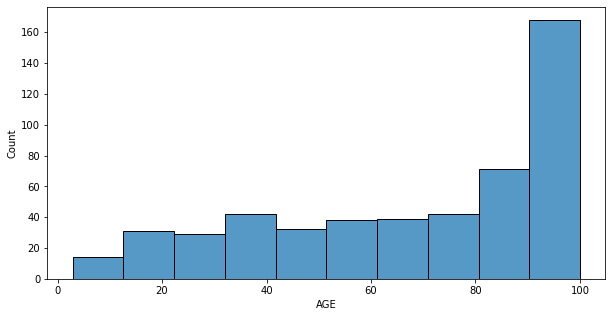

In [58]:
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(df["AGE"],ax=ax)

<AxesSubplot:xlabel='RM', ylabel='Count'>

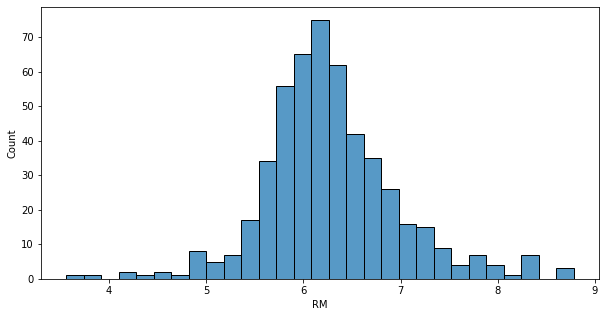

In [59]:
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(df["RM"],ax=ax)

In [69]:
df_tar = df[["CRIM","ZN","INDUS","NOX","RM","AGE","DIS","TAX","PTRATIO","B","LSTAT"]]
df_tar["price"] = hourse_prices

<ipython-input-69-2d7ba2613dcb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_tar["price"] = hourse_prices


<AxesSubplot:>

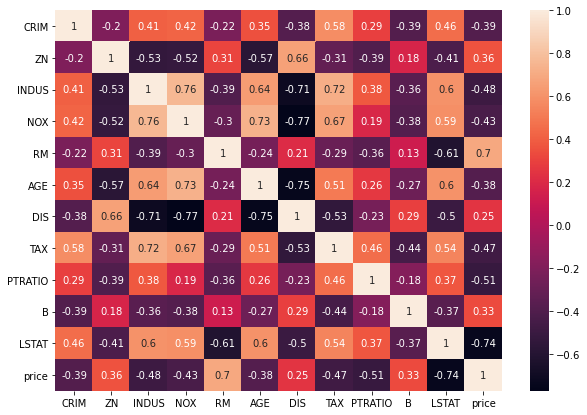

In [70]:
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(df_tar.corr(),annot=True,ax=ax)

# Data Processing

In [91]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# missing values

In [92]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

# outlayers

<AxesSubplot:xlabel='price'>

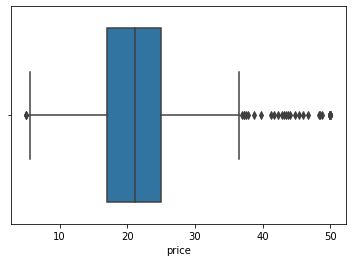

In [98]:
sns.boxplot(x=df["price"],hue=df["CHAS"])

# encoding of text

# scaling & standard of the data

In [99]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [114]:
a = [2,8,6,1]
mean = sum(a)/len(a)
mean

4.25

In [103]:
mini = 1
maxi = 8

In [104]:
(2 - mini)/(maxi-mini)

0.14285714285714285

In [105]:
(8 - mini)/(maxi-mini)

1.0

In [106]:
(6 - mini)/(maxi-mini)

0.7142857142857143

In [107]:
(1 - mini)/(maxi-mini)

0.0

In [108]:
a = [0.14285714285714285,1.0,0.7142857142857143,0.0]

In [109]:
(0.14285714285714285 * (maxi-mini))+mini

2.0

In [110]:
(1.0 * (maxi-mini))+mini

8.0

In [119]:
minmax = MinMaxScaler()

In [135]:
data = [[2, 2], [8, 6], [6, 10], [1, 18]]

In [133]:
new = minmax.fit_transform(data)
new

array([[0.14285714, 0.        ],
       [1.        , 0.25      ],
       [0.71428571, 0.5       ],
       [0.        , 1.        ]])

In [134]:
minmax.inverse_transform(new)

array([[ 2.,  2.],
       [ 8.,  6.],
       [ 6., 10.],
       [ 1., 18.]])

In [137]:
import numpy as np
(2 - mean)/np.std([2,8,6,1])

-0.7863336509949341

In [138]:
(8 - mean)/np.std([2,8,6,1])

1.310556084991557

In [139]:
(6 - mean)/np.std([2,8,6,1])

0.6115928396627265

In [140]:
(1 - mean)/np.std([2,8,6,1])

-1.1358152736593492

In [141]:
ss = StandardScaler()

In [142]:
ss.fit_transform(data)

array([[-0.78633365, -1.18321596],
       [ 1.31055608, -0.50709255],
       [ 0.61159284,  0.16903085],
       [-1.13581527,  1.52127766]])

# Feature Engineering

In [143]:
from sklearn.linear_model import LinearRegression

In [144]:
lr = LinearRegression()

In [150]:
lr.fit(X=df,y=hourse_prices)

LinearRegression()

In [153]:
df.loc[1]

CRIM         0.02731
ZN           0.00000
INDUS        7.07000
CHAS         0.00000
NOX          0.46900
RM           6.42100
AGE         78.90000
DIS          4.96710
RAD          2.00000
TAX        242.00000
PTRATIO     17.80000
B          396.90000
LSTAT        9.14000
Name: 1, dtype: float64

In [186]:
lr.predict([df.loc[1]])

array([25.02556238])

In [161]:
hourse_prices[500]

16.8

# y = mx + c

In [162]:
lr.intercept_

36.459488385089855

In [163]:
lr.coef_

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

In [176]:
np.dot(lr.coef_,df.loc[3]) + lr.intercept_

28.60703648872815

# gradient descent algorithm

# mean-square error (MSE)

In [180]:
np.mean((hourse_prices - y_pred)**2)

21.894831181729213

In [181]:
from sklearn.metrics import mean_squared_error

In [182]:
mean_squared_error(hourse_prices,y_pred)

21.894831181729206

<AxesSubplot:xlabel='Hourse_prices'>

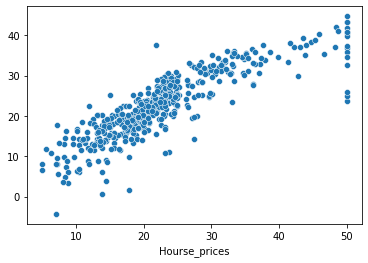

In [183]:
sns.scatterplot(x=hourse_prices,y=y_pred)

# classification

In [192]:
from sklearn.datasets import load_iris

In [194]:
iris = load_iris()

In [196]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
print(df.shape)
df.head()

(150, 4)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [199]:
flowers = pd.Series(iris.target,name="flowers")
flowers.sample(4)

61     1
48     0
43     0
126    2
Name: flowers, dtype: int32

In [200]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [202]:
from IPython.display import Image
Image(url='https://miro.medium.com/max/700/1*uo6VfVH87jRjMZWVdwq3Vw.png')

# Understanding data

In [203]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal length (cm)'>

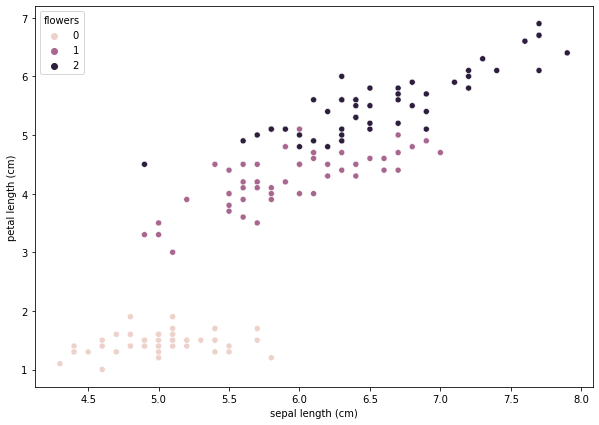

In [206]:
fig,ax=plt.subplots(figsize=(10,7))
sns.scatterplot(x=df["sepal length (cm)"],y=df["petal length (cm)"],hue=flowers,ax=ax)

<AxesSubplot:xlabel='sepal width (cm)', ylabel='petal width (cm)'>

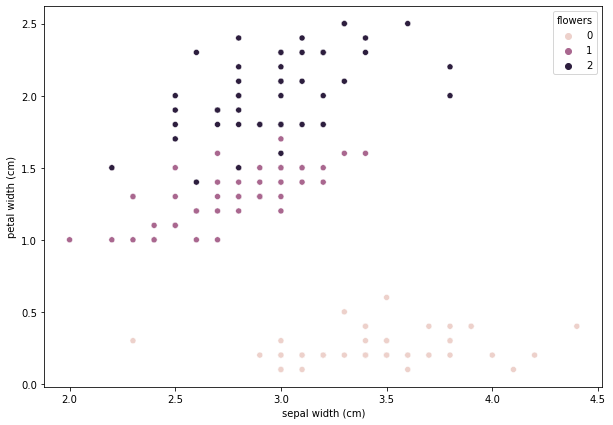

In [207]:
fig,ax=plt.subplots(figsize=(10,7))
sns.scatterplot(x=df["sepal width (cm)"],y=df["petal width (cm)"],hue=flowers,ax=ax)

<AxesSubplot:>

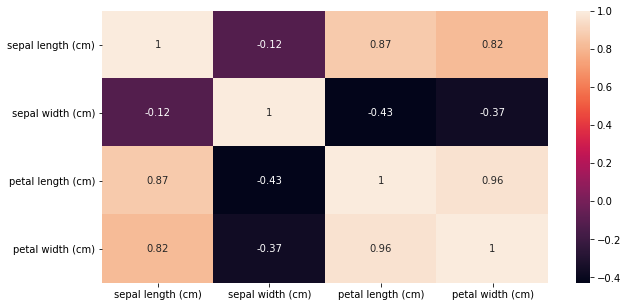

In [209]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,ax=ax)

# data processing

In [210]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

<AxesSubplot:xlabel='sepal width (cm)'>

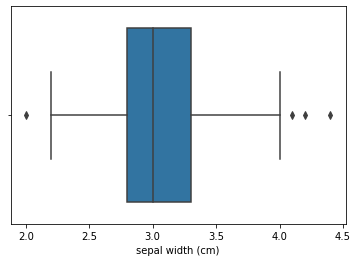

In [215]:
sns.boxplot(x=df["sepal width (cm)"])

# feature engineering

In [235]:
from sklearn.linear_model import LogisticRegression

In [236]:
lrc = LogisticRegression() 

In [237]:
lrc.fit(X=df,y=flowers)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [243]:
lrc.predict(df.loc[100:104])

array([2, 2, 2, 2, 2])

In [244]:
flowers[100:104]

100    2
101    2
102    2
103    2
Name: flowers, dtype: int32

In [245]:
y_pred = lrc.predict(df)

# accuracy

In [249]:
((flowers == y_pred).sum()/len(flowers))*100

97.33333333333334

In [250]:
from sklearn.metrics import accuracy_score

In [251]:
accuracy_score(flowers,y_pred)

0.9733333333333334

In [254]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

In [277]:
dt = DecisionTreeClassifier()

In [292]:
dt.fit(X=df.drop(["flowers"],axis=1),y=flowers)

DecisionTreeClassifier()

In [294]:
accuracy_score(flowers,dt.predict(df.drop(["flowers"],axis=1)))

1.0

In [258]:
rf = RandomForestClassifier()

In [291]:
rf.fit(X=df.drop(["flowers"],axis=1),y=flowers)

RandomForestClassifier()

In [260]:
accuracy_score(flowers,rf.predict(df))

1.0

In [261]:
gbc = GradientBoostingClassifier()

In [262]:
gbc.fit(X=df,y=flowers)

GradientBoostingClassifier()

In [263]:
accuracy_score(flowers,gbc.predict(df))

1.0

In [264]:
from sklearn.tree import plot_tree

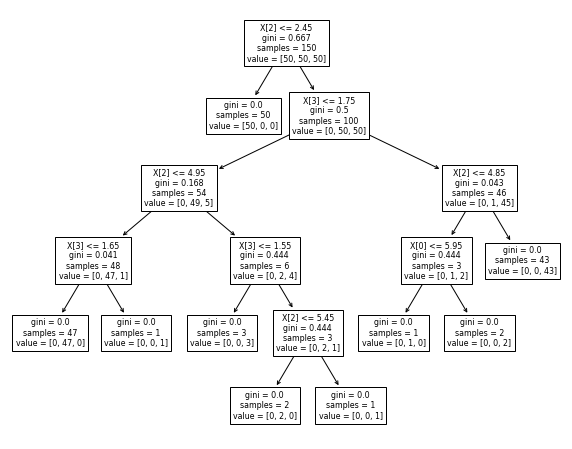

In [295]:
fig,ax= plt.subplots(figsize=(10,8))
plot_tree(dt,ax=ax)
plt.show()